<a href="https://colab.research.google.com/github/Nhathuyy/Colab/blob/main/stroke_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# B1 Cài đặt thư viện

In [ ]:
import pandas as pd
import numpy as np
import scikitplot as skplt

In [ ]:
import nltk
import sklearn
import re 
from nltk.corpus import stopwords 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib as skplt

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Download the corpus of stopwords from NLTK (Natural Language Toolkit)
nltk.download("stopwords") 
#Instantiate ProterStemmer()
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# B2 Đọc file dữ liệu

In [ ]:
url='https://raw.githubusercontent.com/Nhathuyy/Colab/main/healthcare-dataset-stroke-data.csv'
dataset = pd.read_csv(url)
dataset.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


# B3 Xử lý dữ liệu

In [ ]:
dataset.shape

(5110, 12)

In [ ]:
dataset.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [ ]:
dataset.describe

<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

Kiểm tra các giá trị bị thiếu (NaN)

In [ ]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Sử dụng Biểu thức chính quy, xóa tất cả dữ liệu phi văn bản bao gồm các biểu tượng, ký tự đặc biệt, biểu tượng cảm xúc và số. Chuẩn hóa trường hợp bằng cách chuyển đổi tất cả thành chữ thường. Chia các câu thành các từ, giảm các từ xuống gốc của chúng và loại bỏ bất kỳ từ dừng nào. Nối các từ đã tách với một khoảng trắng để tạo thành một câu đơn giản, sạch sẽ.

In [ ]:
def preprocess_column(col_name, col_length):
  preprocessed_data = []
  for i in range(0,col_length):
        col_value = dataset[col_name][i]
        col_value = re.sub('[^a-zA-Z]', ' ', col_value)
        col_value = col_value.lower()
        col_value = col_value.split()
        col_value = [ps.stem(word) for word in col_value if not word in set(stopwords.words('english'))]
        col_value = ' '.join(col_value)
        preprocessed_data.append(col_value)
  return preprocessed_data

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
cols = list(dataset.columns)
cols_data=cols[1:]

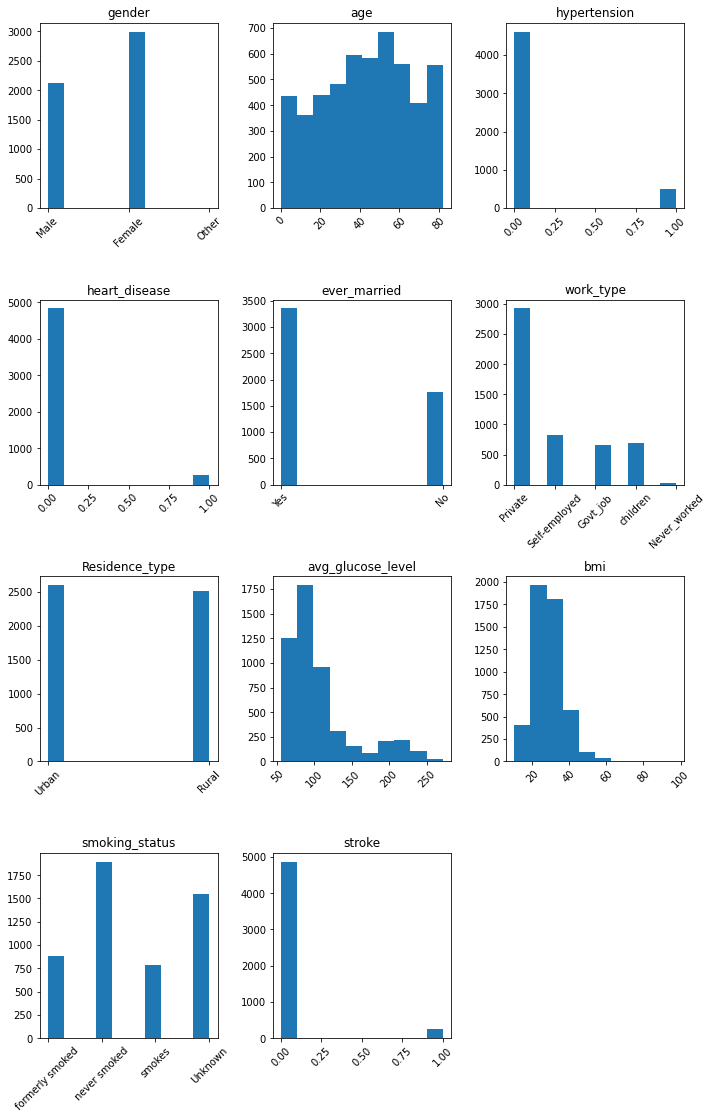

In [ ]:
plt.figure(figsize=(10,30))
for i in range(len(cols_data)):
    plt.subplot(8,3,i+1)
    plt.title(cols_data[i])
    plt.xticks(rotation=45)
    plt.hist(dataset[cols_data[i]])
    
plt.tight_layout()

In [ ]:
dataset['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
dataset['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
dataset[dataset['gender']=='Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [ ]:
dataset = dataset.drop(dataset[dataset['gender']=='Other'].index)


Deal with Missing

In [ ]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
dataset = dataset.dropna(how='any',axis=0)

In [ ]:
print(dataset['bmi'].mean())
print(dataset['bmi'].median())

28.894559902200488
28.1


In [ ]:
bmi_mean=dataset['bmi'].mean()
dataset['bmi']=dataset['bmi'].fillna(bmi_mean)

In [ ]:
dataset['bmi'].isnull().sum()


0

# EDA
Pie chart for stroke or no stroke

In [ ]:
pie_df=pd.DataFrame(dataset.groupby('stroke')['stroke'].count())
pie_df

,stroke
stroke,
0,4699
1,209


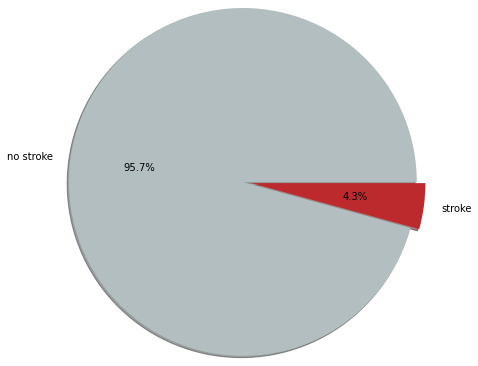

In [ ]:
colors = ['#B2BEBF','#BD2A2E']
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

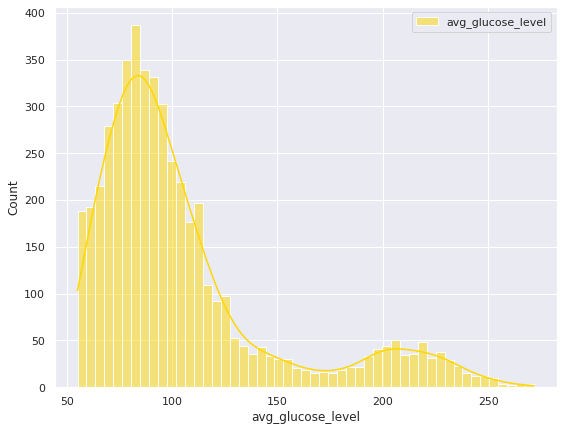

In [ ]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(9,7))
sns.histplot(dataset['avg_glucose_level'], color="#FFD700", label="avg_glucose_level", kde= True)
plt.legend()

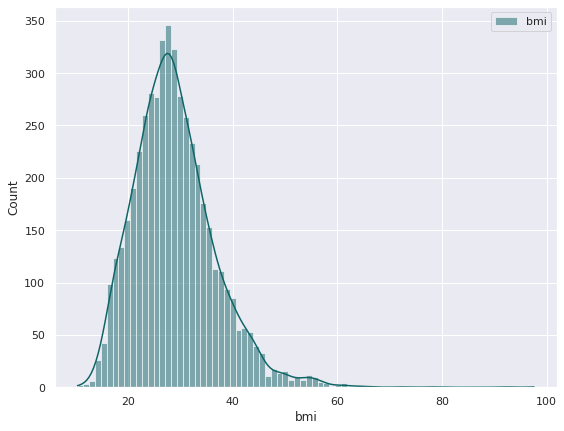

In [ ]:
fig = plt.figure(figsize=(9,7))
sns.histplot(dataset['bmi'], color="#0F6466", label="bmi", kde= True)
plt.legend()

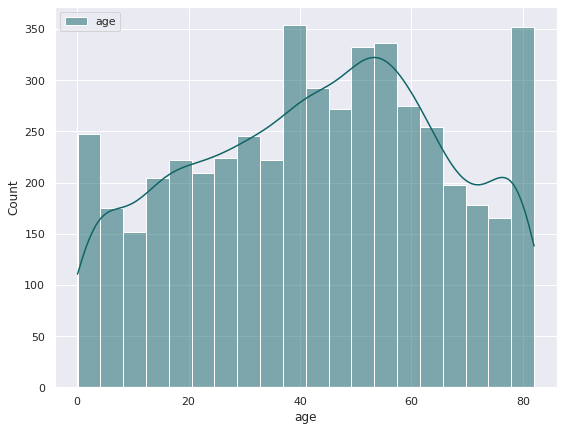

In [ ]:
fig = plt.figure(figsize=(9,7))
sns.histplot(dataset['age'], color="#0F6466", label="age", kde= True)
plt.legend()

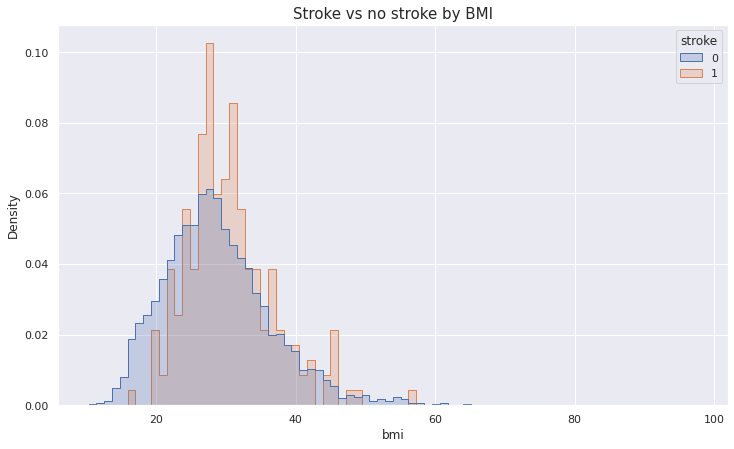

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(
    dataset, x="bmi", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

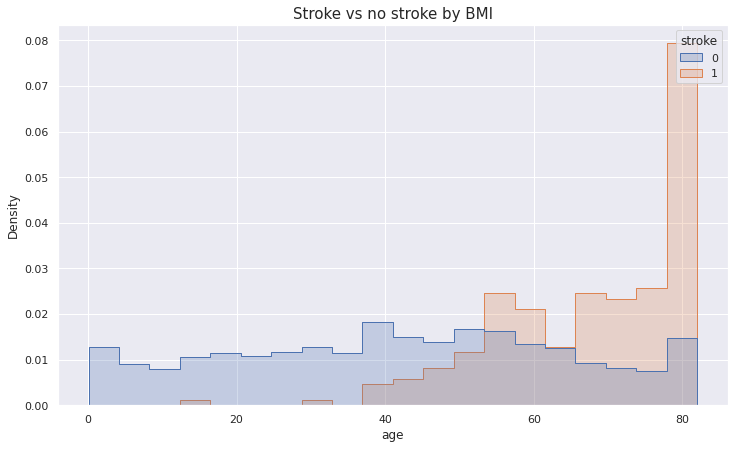

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(
    dataset, x="age", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

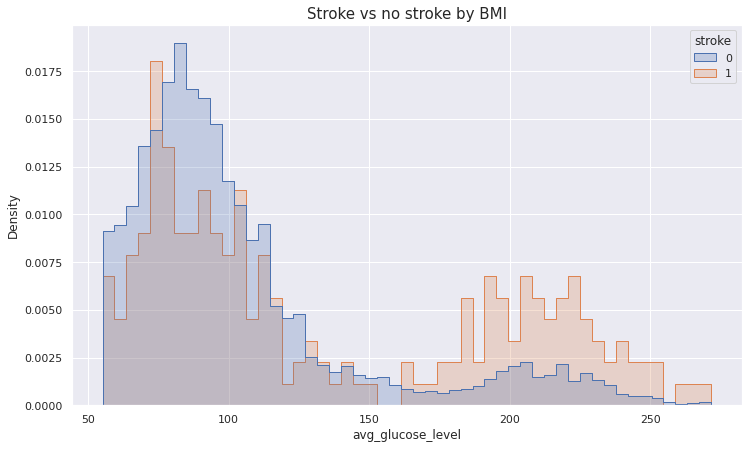

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(
    dataset, x="avg_glucose_level", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

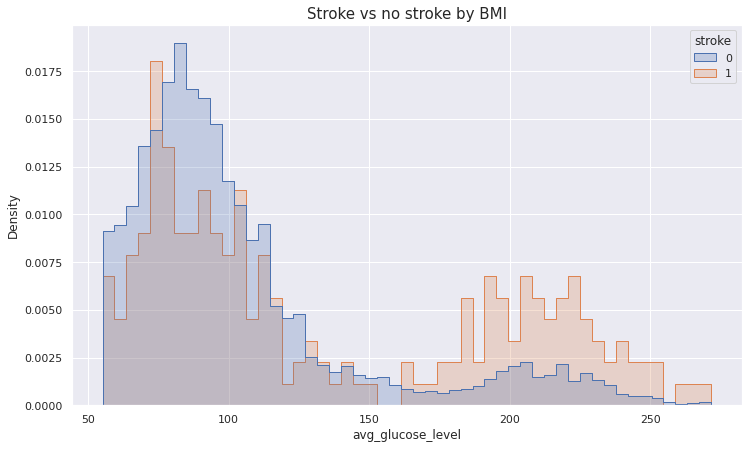

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(
    dataset, x="avg_glucose_level", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

BMI vs Age classified by the gender¶
The normal bmi is 25 so who has bmi more than 25


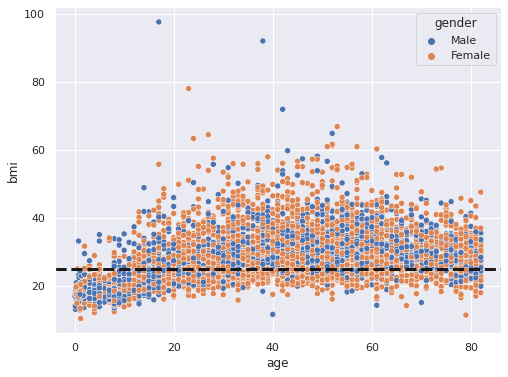

In [ ]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
plt.show()

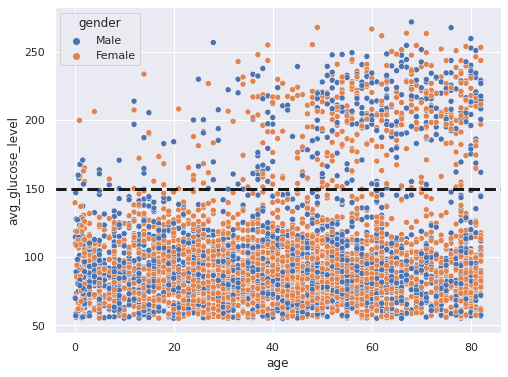

In [ ]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
fig.axhline(y= 150, linewidth=3, color='k', linestyle= '--')
plt.show()

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


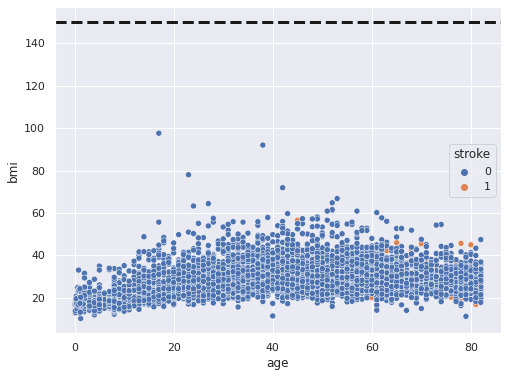

In [ ]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=dataset, x="age", y="bmi", hue='stroke')
fig.axhline(y= 150, linewidth=3, color='k', linestyle= '--')
plt.show()

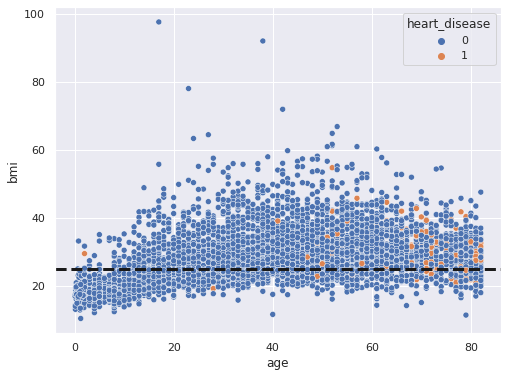

In [ ]:
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=dataset, x="age", y="bmi", hue='heart_disease')
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
plt.show()

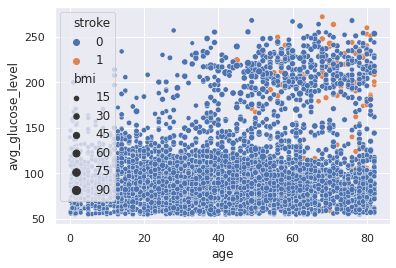

In [ ]:
sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue="stroke", size="bmi")

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


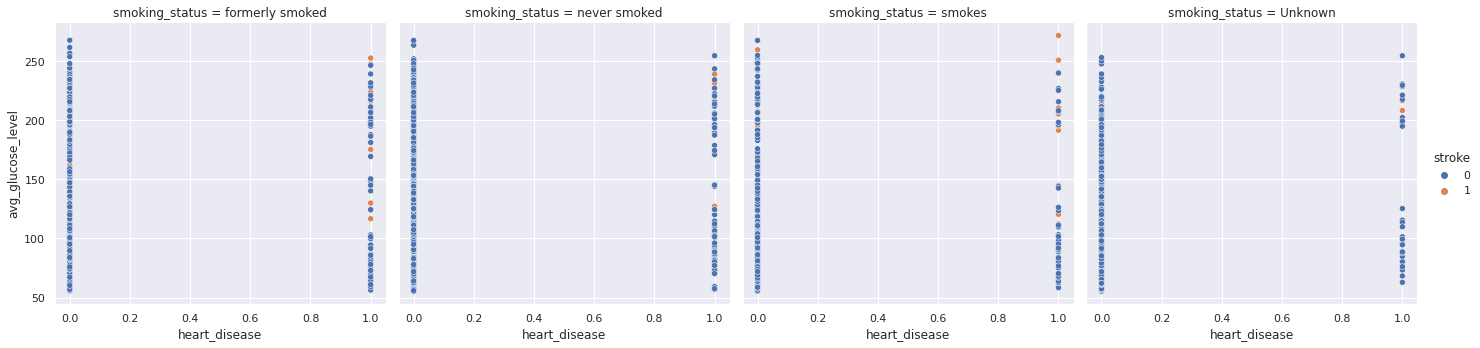

In [ ]:
sns.relplot(
    data=dataset, x="heart_disease", y="avg_glucose_level",
    col="smoking_status", hue="stroke",
    kind="scatter"
)

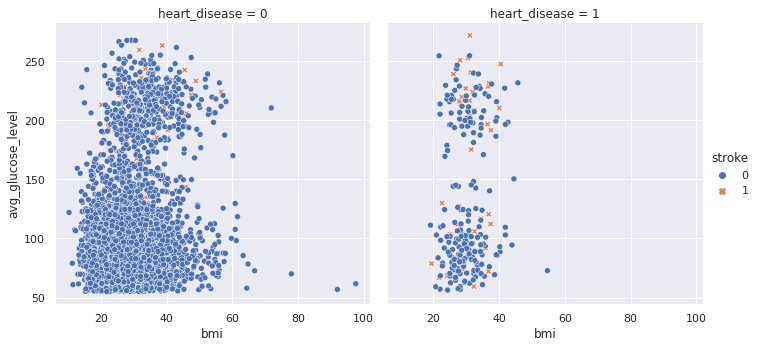

In [ ]:
sns.relplot(
    data=dataset, x="bmi", y="avg_glucose_level",
    col="heart_disease", hue="stroke", style="stroke",
    kind="scatter"
)

In [ ]:
str_only = dataset[dataset['stroke'] == 1]
no_str_only = dataset[dataset['stroke'] == 0]

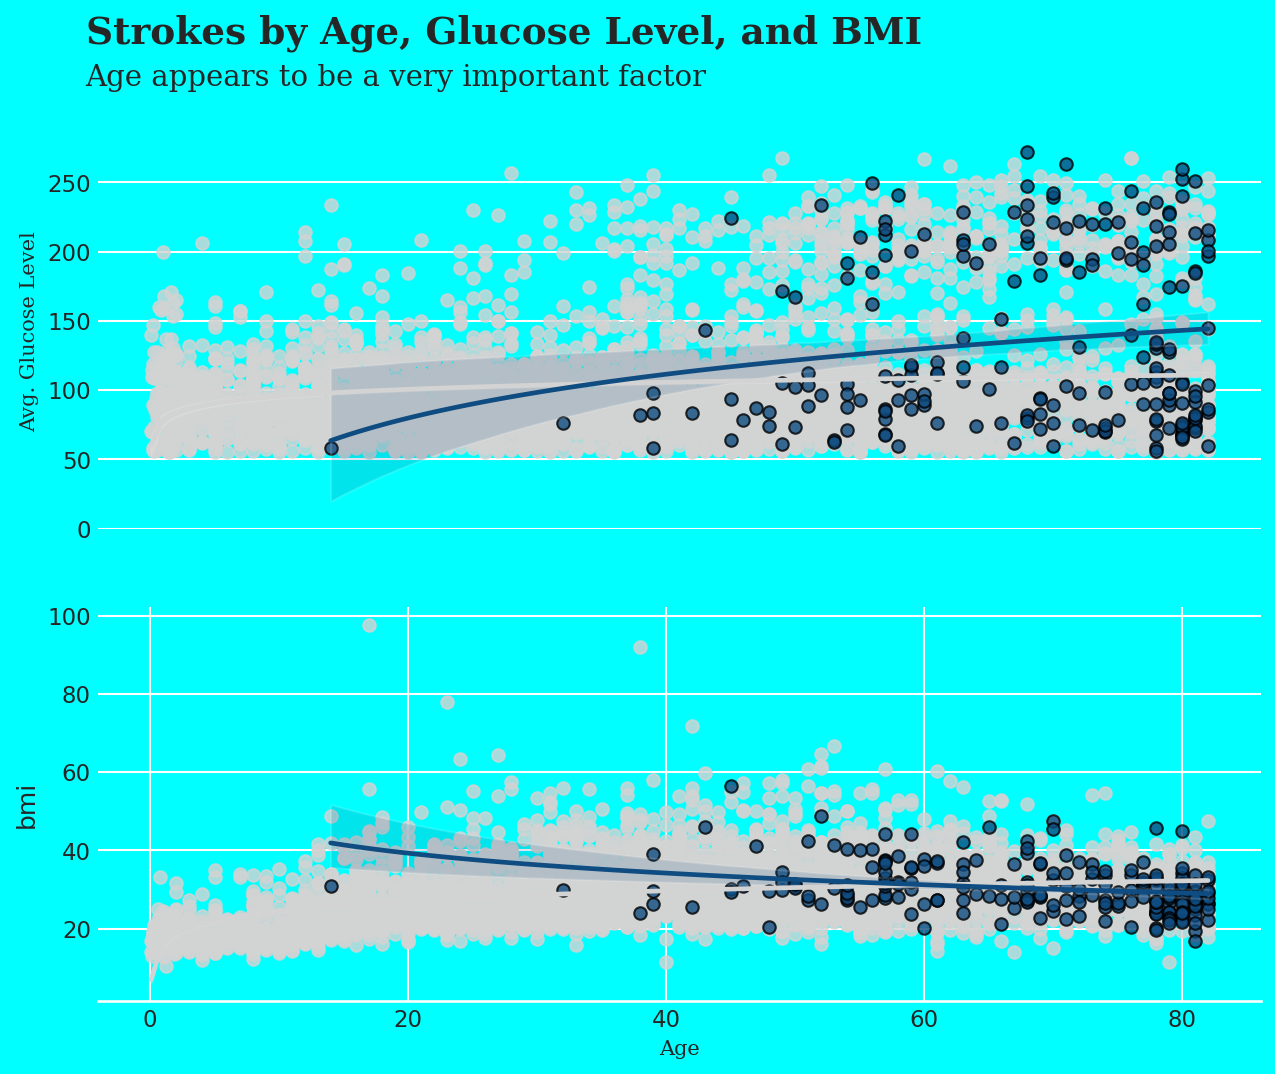

In [ ]:
# Setting up figure and axes
GRID_SIZE = 30
MARGIN = GRID_SIZE

background_color = (0,1,1)  # Colors we use
WALL_COLOR = (0.6 * 255, 0.9 * 255, 0.9 * 255)

# The shape of the maze.  Each character
# represents a different type of object
#   % - Wall
#   . - Food
#   o - Capsule
#   G - Ghost
#   P - Chomp
# Other characters are ignored
fig = plt.figure(figsize=(10,16),dpi=150,facecolor=background_color) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) 

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# glucose

sns.regplot(no_str_only['age'],y=no_str_only['avg_glucose_level'],  
            color='lightgray',
            logx=True,
            ax=ax0)

sns.regplot(str_only['age'],y=str_only['avg_glucose_level'],  
            color='#0f4c81',
            logx=True,scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            ax=ax0)

ax0.set(ylim=(0, None))
ax0.set_xlabel(" ",fontsize=12,fontfamily='serif')
ax0.set_ylabel("Avg. Glucose Level",fontsize=10,fontfamily='serif')

ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

for s in ['top','left','bottom']:
    ax0.spines[s].set_visible(False)


# bmi
sns.regplot(no_str_only['age'],y=no_str_only['bmi'],  
            color='lightgray',
            logx=True,
            ax=ax1)

sns.regplot(str_only['age'],y=str_only['bmi'],  
            color='#0f4c81', scatter_kws={'edgecolors':['black'], 
                                              'linewidth': 1},
            logx=True,
            ax=ax1)

ax1.set_xlabel("Age",fontsize=10,fontfamily='serif')



for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

    
ax0.text(-5,350,'Strokes by Age, Glucose Level, and BMI',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-5,320,'Age appears to be a very important factor',fontsize=14,fontfamily='serif')


ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)



plt.show()

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
dataset['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

# Chuẩn bị cho mô hình

In [ ]:

dataset['gender'] = dataset['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
dataset['Residence_type'] =dataset['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
dataset['work_type'] = dataset['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
dataset['smoking_status'] = dataset['smoking_status'].replace({'never smoked':0,'formerly smoked':1,'smokes':2,'Unknown':-1}).astype(np.uint8)

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,0,1,228.69,36.6,1,1
2,31112,0,80.0,0,1,Yes,0,0,105.92,32.5,0,1
3,60182,1,49.0,0,0,Yes,0,1,171.23,34.4,2,1
4,1665,1,79.0,1,0,Yes,1,0,174.12,24.0,0,1
5,56669,0,81.0,0,0,Yes,0,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,No,255,0,103.08,18.6,255,0
5106,44873,1,81.0,0,0,Yes,1,1,125.20,40.0,0,0
5107,19723,1,35.0,0,0,Yes,1,0,82.99,30.6,0,0
5108,37544,0,51.0,0,0,Yes,0,0,166.29,25.6,1,0


In [ ]:
dataset['smoking_status'].value_counts()

0      1852
255    1483
1       836
2       737
Name: smoking_status, dtype: int64

In [ ]:
dataset['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

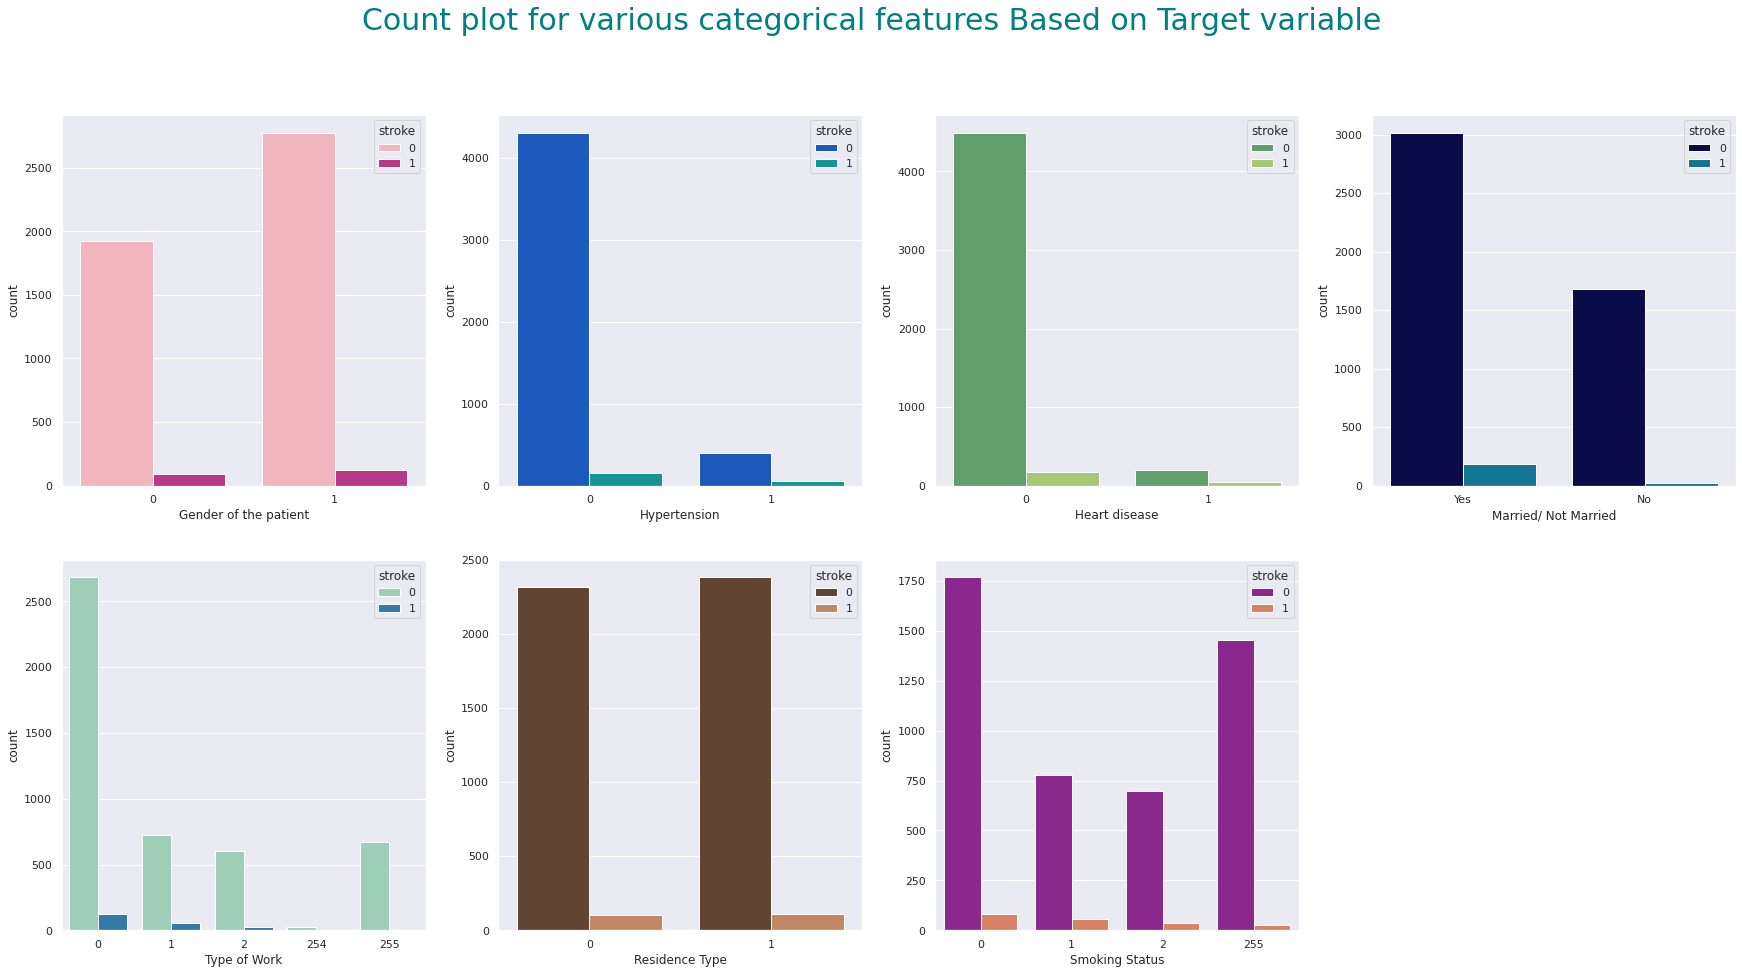

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
ax[1, 3].axis('off')

plt.suptitle('Count plot for various categorical features Based on Target variable', fontsize = 30, color = 'teal')

ax1 = sns.countplot(x ='gender', data= dataset, hue= 'stroke', ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='hypertension', data= dataset, hue= 'stroke', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= dataset, hue= 'stroke', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= dataset, hue= 'stroke', ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= dataset, hue= 'stroke', ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= dataset, hue= 'stroke', ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= dataset, hue= 'stroke', ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

In [ ]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
for col in ['avg_glucose_level', 'bmi']:
    dataset[col] = np.log(dataset[col])

In [ ]:
dataset.describe()

,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,37060.423594,0.590261,42.868810,0.091891,0.049511,36.415648,0.507335,4.586286,3.328467,77.521394,0.042584
std,20995.468407,0.491836,22.556128,0.288901,0.216954,88.630095,0.499997,0.357152,0.265072,116.798635,0.201937
min,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,4.009513,2.332144,0.000000,0.000000
25%,18602.500000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,4.344682,3.157000,0.000000,0.000000
50%,37580.500000,1.000000,44.000000,0.000000,0.000000,0.000000,1.000000,4.518304,3.335770,1.000000,0.000000
75%,55181.750000,1.000000,60.000000,0.000000,0.000000,2.000000,1.000000,4.731759,3.499533,255.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,255.000000,1.000000,5.604846,4.580877,255.000000,1.000000


In [ ]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [ ]:
data2 = pd.get_dummies(dataset, drop_first= True)

In [ ]:
data2.head()

,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_Yes
0,9046,0,67.0,0,1,0,1,5.432367,3.600048,1,1,1
2,31112,0,80.0,0,1,0,0,4.662684,3.481240,0,1,1
3,60182,1,49.0,0,0,0,1,5.143008,3.538057,2,1,1
4,1665,1,79.0,1,0,1,0,5.159745,3.178054,0,1,1
5,56669,0,81.0,0,0,0,1,5.226875,3.367296,1,1,1


In [ ]:
data2[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(data2[['bmi', 'avg_glucose_level', 'age']])

AttributeError: ignored

In [ ]:
data3 = data2.copy()
data3.head()

# Data Splitting

In [ ]:
X  = dataset[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi','smoking_status']]
y = dataset['stroke']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

NameError: ignored

In [ ]:
dataset['gender'].value_counts()

In [ ]:
pip install catboost

In [ ]:
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale= 1.2)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
import scikitplot as skplt

from imblearn.over_sampling import RandomOverSampler

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

# SVM

In [ ]:
parameters = {
    'C':[0.001, 0.01,0.1,1,10, 100, 1000], 
    'gamma':[0.001, 0.01,0.1,1,100, 1000]
}

svm = RandomizedSearchCV(SVC(probability= True), parameters, cv=5)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_svm))

In [ ]:
sc=MinMaxScaler()
x_train = sc.fit_transform(X_train)

In [ ]:
X_test.head(2)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

# Dữ liệu không cân bằng

Điều gì đang xảy ra trong các mô hình của chúng tôi khi chúng tôi đào tạo trên một tập dữ liệu không cân bằng? Như bạn có thể đoán, lý do chúng tôi nhận được độ chính xác 90% trên dữ liệu không cân bằng (với 90% trường hợp trong Loại-1) là vì các mô hình của chúng tôi xem xét dữ liệu và khéo léo quyết định rằng điều tốt nhất nên làm là luôn dự đoán “Class-1” và đạt được độ chính xác cao.
Để chống lại dữ liệu đào tạo mất cân bằng:

1- Thử lấy mẫu lại tập dữ liệu của bạn: Bạn có thể thay đổi tập dữ liệu mà bạn sử dụng để xây dựng mô hình dự đoán của mình để có dữ liệu cân bằng hơn. Thay đổi này được gọi là lấy mẫu tập dữ liệu của bạn và có hai phương pháp chính mà bạn có thể sử dụng để tăng đều các lớp: Bạn có thể thêm bản sao của các bản sao từ lớp được đại diện ít được gọi là lấy mẫu quá mức (hoặc lấy mẫu chính thức hơn với thay thế) hoặc bạn có thể xóa các phiên bản khỏi lớp được đại diện quá mức, được gọi là lấy mẫu dưới mức.

2- Sử dụng các thước đo đánh giá phù hợp: Việc áp dụng các thước đo đánh giá không phù hợp cho mô hình được tạo bằng cách sử dụng dữ liệu không cân bằng có thể nguy hiểm. Hãy tưởng tượng dữ liệu đào tạo của chúng tôi là dữ liệu được minh họa trong biểu đồ trên. Nếu độ chính xác được sử dụng để đo độ tốt của một mô hình, thì một mô hình phân loại tất cả các mẫu thử nghiệm thành “0” sẽ có độ chính xác tuyệt vời (99,8%), nhưng rõ ràng, mô hình này sẽ không cung cấp bất kỳ thông tin có giá trị nào cho chúng tôi. Trong trường hợp này, các chỉ số đánh giá thay thế khác có thể được áp dụng như:

Độ chính xác / Tính cụ thể: có bao nhiêu phiên bản được chọn có liên quan.

Nhớ lại / Độ nhạy: số lượng phiên bản có liên quan được chọn.

Điểm F1: trung bình hài hòa của độ chính xác và độ thu hồi.

MCC: hệ số tương quan giữa phân loại nhị phân quan sát và dự đoán.

AUC: quan hệ giữa tỷ lệ dương tính thật và tỷ lệ dương tính giả.

In [ ]:
# show the value counts of the calsses in the target
#we can find data impalance
print(dataset['stroke'].value_counts())
dataset['stroke'].value_counts().sort_index().plot.bar()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Apply oversampling
oversample = SMOTE()
x_data_balanced, y_data_balanced = oversample.fit_resample(x_train, y_train.ravel())

Modeling
1. Random forest

In [ ]:
# classification with random forest

rf = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', random_state = 0)
rf.fit(x_data_balanced, y_data_balanced)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')
!pip install pywaffle

Mô hình

Tôi sẽ lập mô hình Rừng ngẫu nhiên, SVM và Hồi quy logistic cho nhiệm vụ phân loại này.

Ngoài ra, tôi sẽ sử dụng xác nhận chéo 10 lần.

In [ ]:
print(y_train_resh.value_counts())
print(y_test.value_counts())